In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Iterpolation

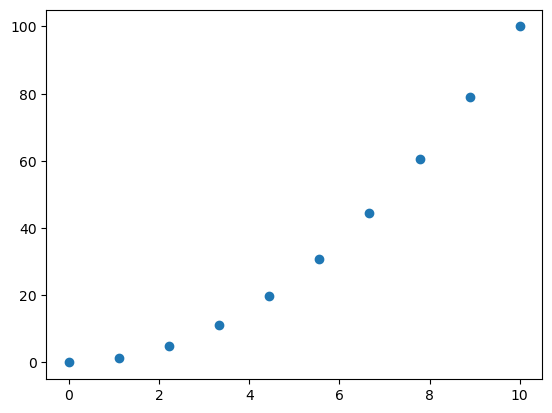

In [2]:
x = np.linspace(0,10,10)
y = x**2
plt.scatter(x,y)

In [3]:
from scipy.interpolate import interp1d

In [10]:
f = interp1d(x, y, kind='linear')
result = f(x)

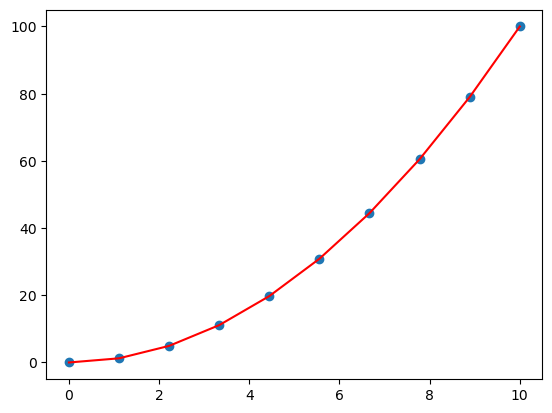

In [11]:
plt.scatter(x, y)
plt.plot(x, result, c='r')

## Optimize

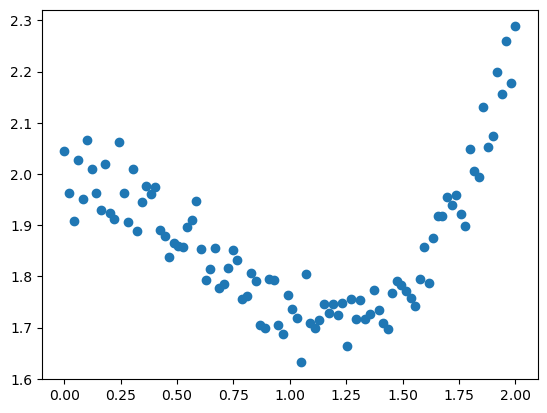

In [15]:
x = np.linspace(0, 2, 100)
y = 1/3*x**3 - 3/5*x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x, y)

In [16]:
def f(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

In [17]:
from scipy import optimize

In [19]:
params, param_cov = optimize.curve_fit(f, x, y)

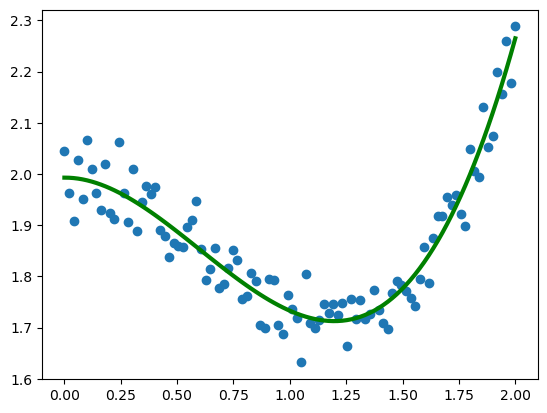

In [20]:
plt.scatter(x, y)
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), c='g', lw=3)

## Minimisation

In [35]:
def f(x):
    return x**2 + 10*np.sin(x)

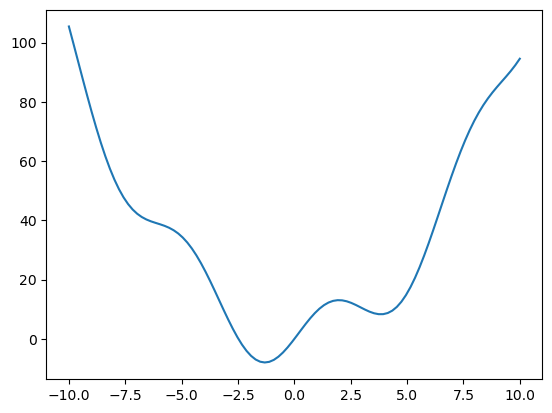

In [36]:
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))

In [37]:
optimize.minimize(f, x0=-5).x

array([-1.30644002])

## Traitement du signal

In [38]:
from scipy import signal

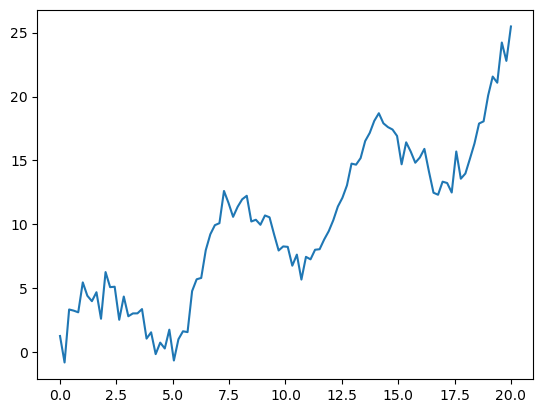

In [39]:
x = np.linspace(0, 20, 100)
y = x + 4*np.sin(x) + np.random.randn(x.shape[0])
plt.plot(x, y)

In [40]:
new_y = signal.detrend(y)

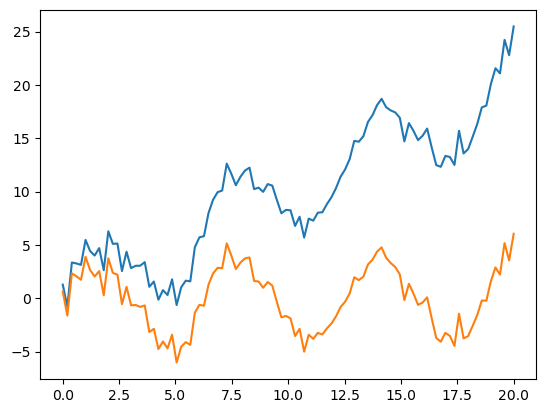

In [41]:
plt.plot(x, y, label='original')
plt.plot(x, new_y, label='detrended')

In [42]:
from scipy import fftpack

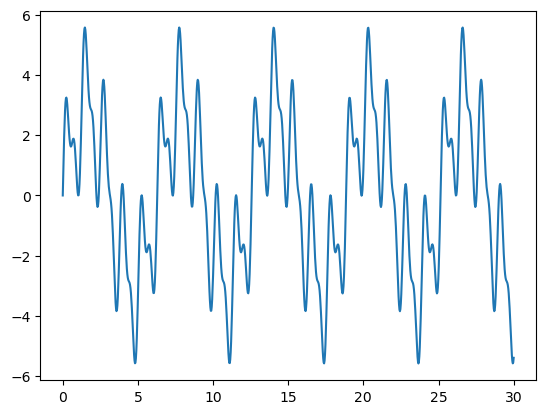

In [55]:
x = np.linspace(0, 30, 1000)
y = 3 * np.sin(x) + 2 * np.sin(5*x) + np.sin(10*x)
plt.plot(x, y)

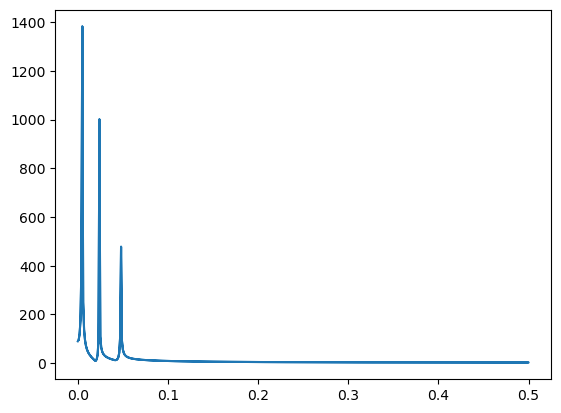

In [56]:
fourier = fftpack.fft(y)
freq = fftpack.fftfreq(y.size)
power = np.abs(fourier)
plt.plot(np.abs(freq), power)

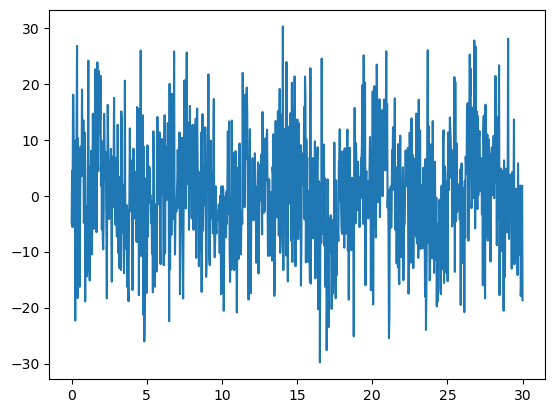

In [77]:
y = 3 * np.sin(x) + 2 * np.sin(5*x) + np.sin(10*x) + np.random.randn(x.shape[0])*10
plt.plot(x, y)

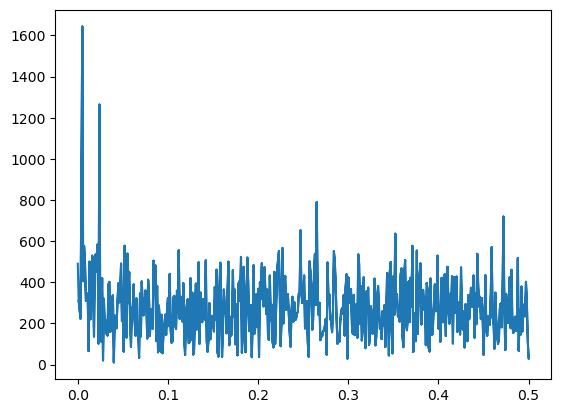

In [78]:
fourier = fftpack.fft(y)
freq = fftpack.fftfreq(y.size)
power = np.abs(fourier)
plt.plot(np.abs(freq), power)

In [79]:
fourier[power < 900] = 0

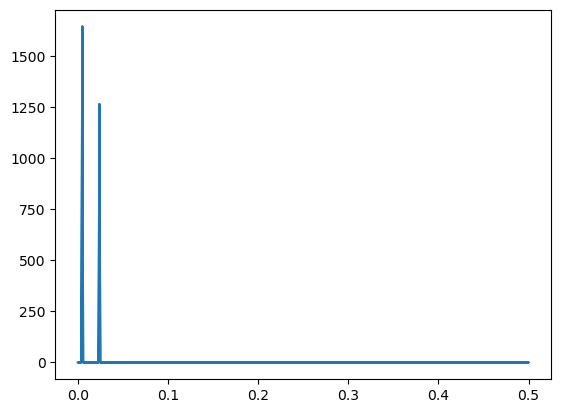

In [80]:
plt.plot(np.abs(freq), np.abs(fourier))

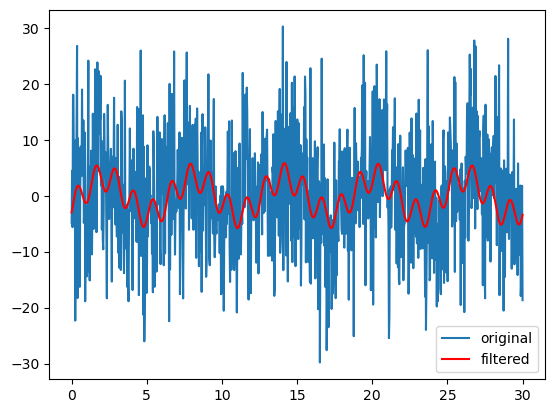

In [81]:
filtered_signal = fftpack.ifft(fourier)
plt.plot(x, y, label='original')
plt.plot(x, filtered_signal, c='r' , label='filtered')
plt.legend()


## Traitement d'image

In [82]:
from scipy import ndimage

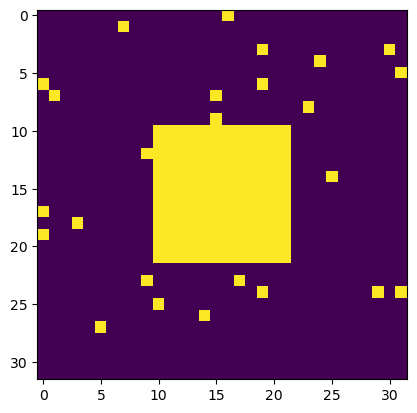

In [83]:
np.random.seed(0)
x = np.zeros((32, 32))
x[10:-10, 10:-10] = 1
x[np.random.randint(0, 32, 30), np.random.randint(0, 32, 30)] = 1
plt.imshow(x)

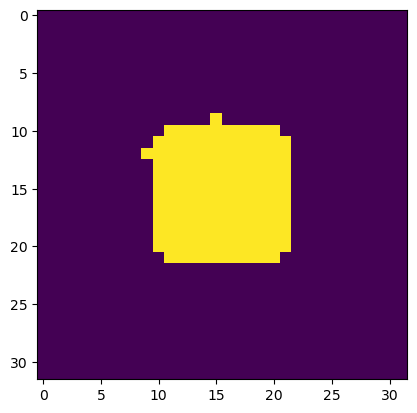

In [84]:
open_x = ndimage.binary_opening(x)
plt.imshow(open_x)

(800, 764)

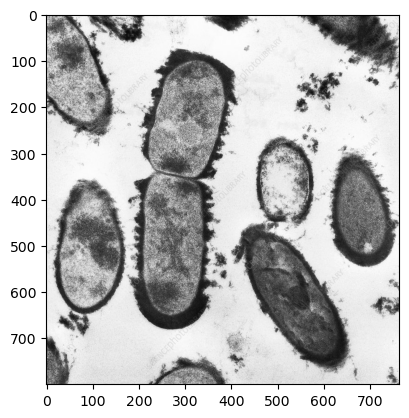

In [96]:
image = plt.imread('bacterie.jpg')
image = image[:,:,0]
plt.imshow(image, cmap='gray')
image.shape

(array([1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 5.0000e+00,
        7.0000e+00, 9.0000e+00, 8.0000e+00, 1.7000e+01, 0.0000e+00,
        1.9000e+01, 4.4000e+01, 5.4000e+01, 1.0100e+02, 9.4000e+01,
        1.4400e+02, 1.8400e+02, 2.4800e+02, 0.0000e+00, 3.6400e+02,
        4.3700e+02, 4.9100e+02, 6.7800e+02, 7.8800e+02, 8.5600e+02,
        1.0010e+03, 1.1450e+03, 1.2820e+03, 0.0000e+00, 1.3080e+03,
        1.4720e+03, 1.5480e+03, 1.6130e+03, 1.7200e+03, 1.8400e+03,
        1.9850e+03, 2.0430e+03, 0.0000e+00, 2.1080e+03, 2.1340e+03,
        2.2320e+03, 2.3080e+03, 2.2800e+03, 2.2610e+03, 2.3480e+03,
        2.3860e+03, 2.3790e+03, 0.0000e+00, 2.4920e+03, 2.4970e+03,
        2.4140e+03, 2.5050e+03, 2.4790e+03, 2.4300e+03, 2.3790e+03,
        2.3890e+03, 0.0000e+00, 2.4050e+03, 2.2720e+03, 2.3780e+03,
        2.4130e+03, 2.4200e+03, 2.3340e+03, 2.3780e+03, 2.3410e+03,
        2.4590e+03, 0.0000e+00, 2.3250e+03, 2.2130e+03, 2.3420e+03,
        2.2270e+03, 2.1870e+03, 2.2060e+03, 2.15

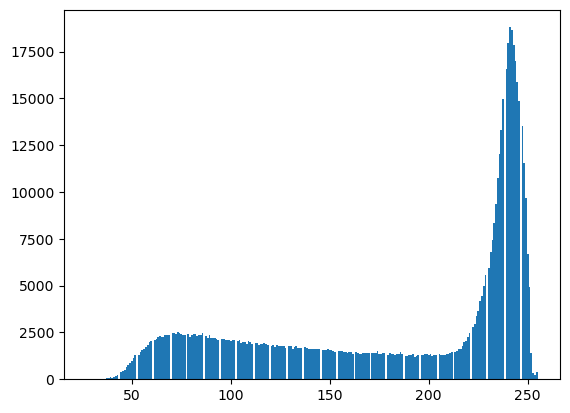

In [97]:
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255)

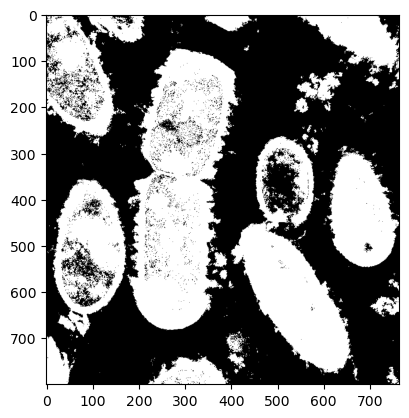

In [107]:
image_2 = image < 200
plt.imshow(image_2, cmap='gray')

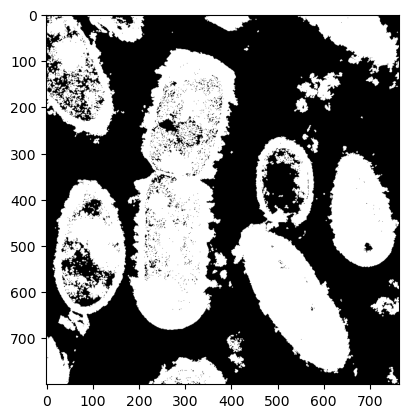

In [113]:
open_x = ndimage.binary_opening(image_2)
plt.imshow(open_x, cmap='gray')

In [126]:
label_image, n_labels = ndimage.label(open_x)

In [127]:
print(n_labels)

233


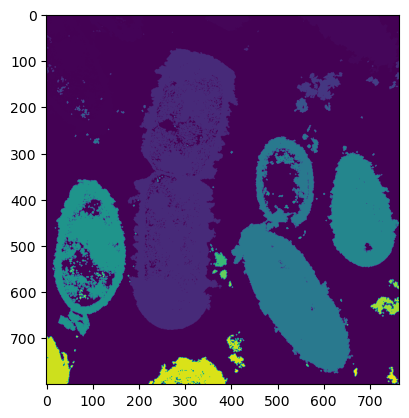

In [128]:
plt.imshow(label_image)

In [129]:
sizes = ndimage.sum(open_x, label_image, range(n_labels + 1))

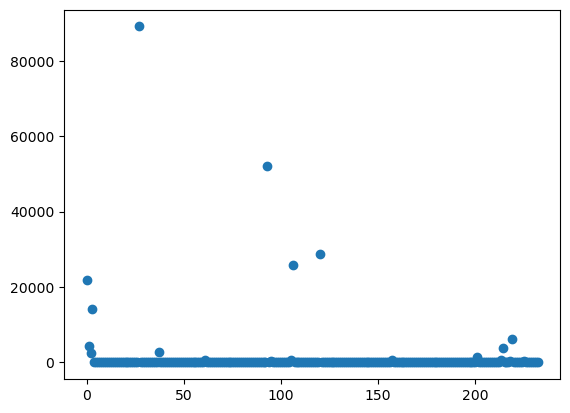

In [131]:
plt.scatter(range(n_labels), sizes[1:])